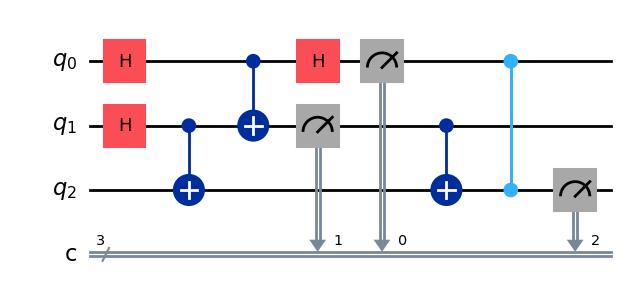

Teleportation result = {'101': 134, '111': 139, '100': 116, '000': 129, '011': 129, '010': 134, '110': 119, '001': 124}


In [1]:
# --- Quantum Teleportation (Qiskit 2.x) ---

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create 3-qubit, 3-classical-bit circuit
# Qubit 0: Message qubit (state to teleport)
# Qubit 1: Alice's qubit (part of entangled pair)
# Qubit 2: Bob's qubit (destination of teleportation)
qc = QuantumCircuit(3, 3)

# 1) Prepare the message to teleport
qc.h(0)  # You can change this to any state (H gives |+>)

# 2) Create a Bell pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

# 3) Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# 4) Bob applies quantum corrections based on measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# 5) Measure Bob’s qubit (result should match teleported state)
qc.measure(2, 2)

# Draw the circuit
display(qc.draw('mpl'))
plt.show()

# Run on simulator
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

# Print & plot result
print("Teleportation result =", counts)
plot_histogram(counts)
plt.show()